# More advanced graphs

## Table of contents:
 - [1 Calculating a rate](#1-Calculating)
 - [2 Load the data](#2-Load)
 - [3 Check the number of female/male passengers](#3-Check-number)
 - [4 Calculate the survival rates for female and male](#4-Calculate-survival)
 - [5 Plot the survival rates](#5-Plot)

# 1 Calculating a rate <a name="1-Calculating"></a>

We’ve already learned how to create a basic histogram based on the data in a single column. Let’s see an example of a more complex calculation we might want to achieve with the data. For the purposes of understanding the titanic incident and comparing parts of the data it will be useful to calculate a rate. In this case, we want to know the survival rates of male vs female passengers (i.e. the proportion of the male and female passengers that lived to tell the tale).  

# 2 Load the data <a name="2-Load"></a>

The first step is to load the packages and the dataset. Run the code below. 

In [1]:
import pandas as pd 

import matplotlib.pyplot as plt 

titanic_df = pd.read_csv('titanic.csv', decimal='.') 
# note we didn't explicitly set a columns delimiter, check the documentation what’s the default value 

titanic_df 

Matplotlib is building the font cache; this may take a moment.


,PassengerID,PClass,Age,Sex,Survived
0,1,1st,29.00,female,1
1,2,1st,2.00,female,0
2,3,1st,30.00,male,0
3,4,1st,25.00,female,0
4,5,1st,0.92,male,1
...,...,...,...,...,...
1308,1309,3rd,27.00,male,0
1309,1310,3rd,26.00,male,0
1310,1311,3rd,22.00,male,0
1311,1312,3rd,24.00,male,0


# 3 Check the number of female/male passengers <a name="3-Check-number"></a>

Next, we’ll use [`Series.value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) to output the number of male and female passengers onboard. Note: the output is a pandas Series, which has the row structure of (index, value), that is, in the output ‘male’ and ‘female’ are index labels and the counts are their corresponding values. Run the code below. 

In [2]:
# we first select a column using the [] operator, which returns a pandas Series object, 

# then we apply the method value_counts() on that Series (which represents the column Sex) 

sex_counts = titanic_df['Sex'].value_counts() 

sex_counts 

male      851
female    462
Name: Sex, dtype: int64

# 4 Calculate the survival rates for female and male <a name="4-Calculate-survival"></a>

To calculate the survival rates based on Sex, we can use the value counts method again. Run the code below. 

In [3]:
survived_counts = titanic_df[['Survived', 'Sex']].value_counts().sort_index() 
# using two columns or more, will count unique rows 
survived_counts 

Survived  Sex   
0         female    154
          male      709
1         female    308
          male      142
dtype: int64

To find the survival rates among females and males (separately) we can select only the passengers that survived and divide each count by the corresponding total, i.e. survived_females/total_females. 

Run the code below. 

In [4]:
survived_by_sex = survived_counts.loc[1] # we select only the rows where the first index level is 1  

survived_by_sex 

Sex
female    308
male      142
dtype: int64

Now we’ll divide by the corresponding totals, using the [`Series.div() method`](https://pandas.pydata.org/docs/reference/api/pandas.Series.div.html). Run the code below. 

In [5]:
survival_rate_by_sex = survived_by_sex.div(sex_counts) # divide Series by Series with matching index 

survival_rate_by_sex 

female    0.666667
male      0.166863
dtype: float64

In fact, since the Survival categories are represented by `0` and `1`, this calculation is equivalent to grouping by Sex and then calculating the mean of the Survived column per group, using [`DataFrame.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)(we can achieve this with a single line. Run the code below. 

In [6]:
survival_rate_by_sex = titanic_df.groupby(['Sex'])['Survived'].mean() 

survival_rate_by_sex 

Sex
female    0.666667
male      0.166863
Name: Survived, dtype: float64

# 5 Plot the survival rates <a name="5-Plot"></a>

Finally, let’s see this expressed as graphical charts. Run the code below. 

Text(0, 0.5, 'Proportion Survived')

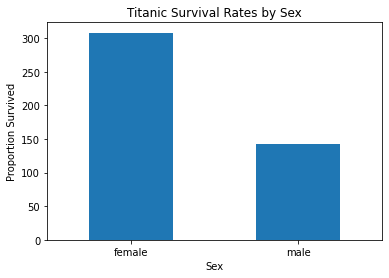

In [7]:
survived_by_sex.plot(kind='bar', rot=0, title='Titanic Survival Rates by Sex') 
# rot indicates the rotation of the x-ticks 

plt.ylabel("Proportion Survived") 

Now test your understanding, using the examples of the code above create a plot of survival rates by class (the column PClass). You can find the solution at the bottom. 

Text(0, 0.5, 'Proportion Survived')

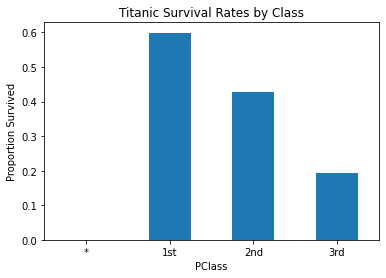

In [10]:
survival_rate_by_class = titanic_df.groupby(['PClass'])['Survived'].mean() 

survival_rate_by_class.plot(kind='bar', rot=0, title='Titanic Survival Rates by Class') 

plt.ylabel("Proportion Survived")  

As you may have noticed we have multiple different ways to solve any problem with code, another way to plot a similar comparison would be to use the [`seaborn.pointplot()`](https://seaborn.pydata.org/generated/seaborn.pointplot.html) function. Run the code below. 

Text(0, 0.5, 'Proportion Survived')

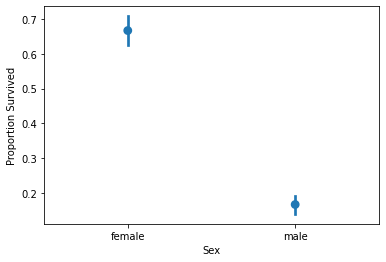

In [9]:
import seaborn as sns 

sns.pointplot(data=titanic_df, x='Sex', y='Survived', join=False) 

plt.ylabel('Proportion Survived') 